In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMModel, LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import *

import warnings
warnings.simplefilter('ignore')


In [2]:
df=pd.read_csv('drug_data_with_sentiment.csv')
df.head()

,drugName,condition,review,rating,date,usefulCount,sentiment,sentiment_label
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54,0.275000,Positive
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3,0.166667,Positive
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,"April 27, 2016",3,-0.136508,Negative
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24,0.103571,Positive
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166,0.168194,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   drugName         13944 non-null  object 
 1   condition        13944 non-null  object 
 2   review           13944 non-null  object 
 3   rating           13944 non-null  int64  
 4   date             13944 non-null  object 
 5   usefulCount      13944 non-null  int64  
 6   sentiment        13944 non-null  float64
 7   sentiment_label  13944 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 871.6+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

drugName           0
condition          0
review             0
rating             0
date               0
usefulCount        0
sentiment          0
sentiment_label    0
dtype: int64

In [6]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'sentiment', 'sentiment_label'],
      dtype='object')

In [7]:
df.head()

,drugName,condition,review,rating,date,usefulCount,sentiment,sentiment_label
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,"March 9, 2017",54,0.275000,Positive
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,"May 7, 2011",3,0.166667,Positive
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,"April 27, 2016",3,-0.136508,Negative
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,"October 24, 2017",24,0.103571,Positive
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,"June 20, 2013",166,0.168194,Positive


In [8]:
a=['drugName', 'rating', 'date', 'usefulCount','sentiment', 'sentiment_label']
df.drop(a,inplace=True,axis=1)
df.head()

,condition,review
0,Depression,"""I have taken anti-depressants for years, with..."
1,Depression,"""1 week on Zoloft for anxiety and mood swings...."
2,Depression,"""my gp started me on Venlafaxine yesterday to ..."
3,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
4,Depression,"""This medicine saved my life. I was at my wits..."


In [9]:
# Pre-process data
stop_words=set(stopwords.words('english'))
stemmer= SnowballStemmer('english')

In [10]:
def preprocess_text(text):
    #Remove Punctuation and special characters
    text=re.sub(r"[^a-zA-Z0-9]", " ",text.lower())
    
    # Tokenize The text
    tokens=nltk.word_tokenize(text)
    
    #Remove the stopwords
    tokens=[token for token in tokens if token not in stop_words]
    
    #stem the tokens
    stemmed_tokens=[stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

df['review_text']=df["review"].apply(preprocess_text)
df.head()

,condition,review,review_text
0,Depression,"""I have taken anti-depressants for years, with...",taken anti depress year improv most moder seve...
1,Depression,"""1 week on Zoloft for anxiety and mood swings....",1 week zoloft anxieti mood swing take 50mg mor...
2,Depression,"""my gp started me on Venlafaxine yesterday to ...",gp start venlafaxin yesterday help depress cha...
3,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",hey guy 039 4 month sinc last post want give m...
4,Depression,"""This medicine saved my life. I was at my wits...",medicin save life wit end anti depress readi g...


# Model Building

In [16]:
# Convert the text data into numerical features using TF-IDF
vectorizer =TfidfVectorizer()
X = vectorizer.fit_transform(df["review_text"])

y = df["condition"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=90)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('X_test:',X_test.shape)

X_train: (10458, 9903)
y_train: (10458,)
X_test: (3486, 9903)
X_test: (3486, 9903)


In [17]:
X_test

<3486x9903 sparse matrix of type '<class 'numpy.float64'>'
	with 126143 stored elements in Compressed Sparse Row format>

In [18]:
y_test

1465        Diabetes, Type 2
12379             Depression
321               Depression
1163        Diabetes, Type 2
1837              Depression
                ...         
9094              Depression
8718        Diabetes, Type 2
5878     High Blood Pressure
1533              Depression
10145             Depression
Name: condition, Length: 3486, dtype: object

Training Accuracy:90.05% 
Test Accuracy:88.64% 
Precision: 89.95% 
Recall: 88.64% 
f1_score: 87.92% 
                     precision    recall  f1-score   support

         Depression       0.86      1.00      0.92      2265
   Diabetes, Type 2       0.98      0.75      0.85       644
High Blood Pressure       0.97      0.60      0.74       577

           accuracy                           0.89      3486
          macro avg       0.94      0.78      0.84      3486
       weighted avg       0.90      0.89      0.88      3486



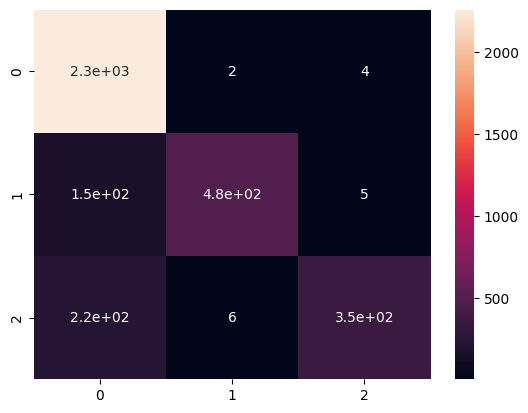

In [19]:
# Train the naive model
model_m=MultinomialNB()
model_m.fit(X_train,y_train)

# Evaluate Model
y_pred_m=model_m.predict(X_test)
y_pred_mt=model_m.predict(X_train)

accuracy_n=accuracy_score(y_test,y_pred_m)*100

print('Training Accuracy:{:.2f}% '.format(accuracy_score(y_train,y_pred_mt)*100))
print('Test Accuracy:{:.2f}% '.format(accuracy_n))

print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_m,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_m,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_m,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_m),annot=True)
print(classification_report(y_test,y_pred_m))
 

Accuracy: 88.64% 
Precision: 89.95% 
Recall: 88.64% 
f1_score: 87.92% 
                     precision    recall  f1-score   support

         Depression       0.86      1.00      0.92      2265
   Diabetes, Type 2       0.98      0.75      0.85       644
High Blood Pressure       0.97      0.60      0.74       577

           accuracy                           0.89      3486
          macro avg       0.94      0.78      0.84      3486
       weighted avg       0.90      0.89      0.88      3486



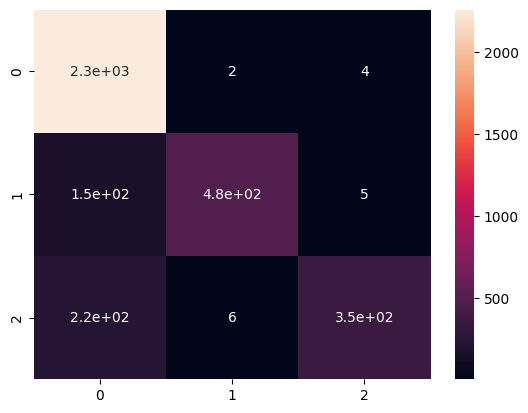

In [20]:
# Train the Logistics model
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

# Evaluate Model
y_pred_lr=model_m.predict(X_test)
accuracy_lr=accuracy_score(y_test,y_pred_lr)*100

print('Accuracy: {:.2f}% '.format(accuracy_lr))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_lr,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_lr,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_lr,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_lr),annot=True)
print(classification_report(y_test,y_pred_lr))
 

Test Accuracy:95.78% 
Precision: 95.84% 
Recall: 95.78% 
f1_score: 95.72% 
                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      2265
   Diabetes, Type 2       0.98      0.92      0.95       644
High Blood Pressure       0.96      0.86      0.91       577

           accuracy                           0.96      3486
          macro avg       0.96      0.92      0.94      3486
       weighted avg       0.96      0.96      0.96      3486



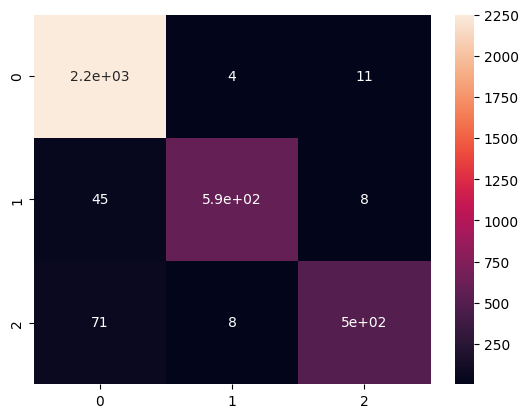

In [21]:
# Train the naive model
model_s=SVC()
model_s.fit(X_train,y_train)

# Evaluate Model
y_pred_s=model_s.predict(X_test)

accuracy_svc=accuracy_score(y_test,y_pred_s)*100

print('Test Accuracy:{:.2f}% '.format(accuracy_svc))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_s,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_s,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_s,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_s),annot=True)
print(classification_report(y_test,y_pred_s))
 

Accuracy: 85.11% 
Precision: 86.98% 
Recall: 85.11% 
f1_score: 83.88% 
                     precision    recall  f1-score   support

         Depression       0.82      0.99      0.90      2265
   Diabetes, Type 2       0.98      0.52      0.68       644
High Blood Pressure       0.93      0.66      0.77       577

           accuracy                           0.85      3486
          macro avg       0.91      0.73      0.79      3486
       weighted avg       0.87      0.85      0.84      3486



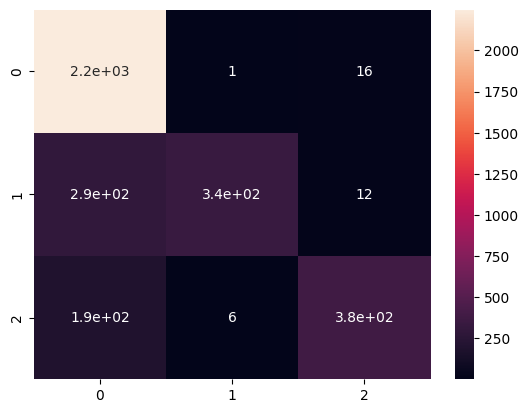

In [22]:
# Train the decision tree model
model_dt=DecisionTreeClassifier(criterion="entropy",random_state=45,max_depth=5)
model_dt.fit(X_train,y_train)

# Evaluate Model
y_pred_dt=model_dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)*100

print('Accuracy: {:.2f}% '.format(accuracy_dt))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_dt,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_dt,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_dt,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_dt),annot=True)
print(classification_report(y_test,y_pred_dt))
 

Accuracy: 95.38% 
Precision: 95.50% 
Recall: 95.38% 
f1_score: 95.30% 
                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.97      2265
   Diabetes, Type 2       0.98      0.92      0.95       644
High Blood Pressure       0.97      0.84      0.90       577

           accuracy                           0.95      3486
          macro avg       0.97      0.92      0.94      3486
       weighted avg       0.95      0.95      0.95      3486



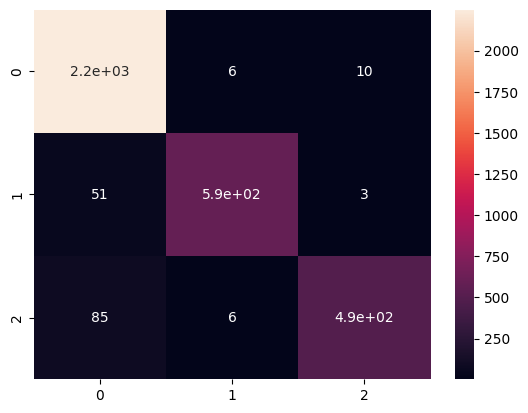

In [23]:
# Train the Ensemble (Random Forest) model
model_en=RandomForestClassifier()
model_en.fit(X_train,y_train)

# Evaluate Model
y_pred_en=model_en.predict(X_test)
accuracy_en=accuracy_score(y_test,y_pred_en)*100

print('Accuracy: {:.2f}% '.format(accuracy_en))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_en,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_en,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_en,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_en),annot=True)
print(classification_report(y_test,y_pred_en))
 

Accuracy: 92.66% 
Precision: 93.05% 
Recall: 92.66% 
f1_score: 92.42% 
                     precision    recall  f1-score   support

         Depression       0.91      1.00      0.95      2265
   Diabetes, Type 2       0.98      0.83      0.90       644
High Blood Pressure       0.96      0.76      0.85       577

           accuracy                           0.93      3486
          macro avg       0.95      0.86      0.90      3486
       weighted avg       0.93      0.93      0.92      3486



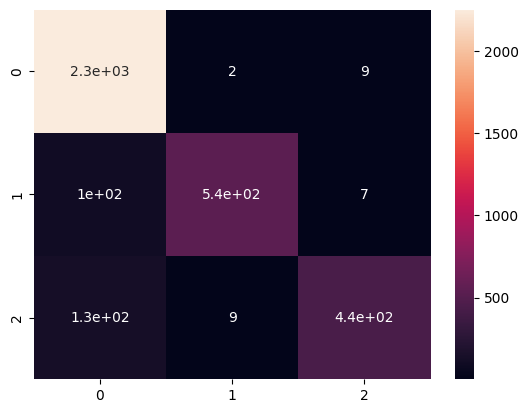

In [24]:
# Train the Gradient Boosting model
model_gb=GradientBoostingClassifier()
model_gb.fit(X_train,y_train)

# Evaluate Model
y_pred_gb=model_gb.predict(X_test)
accuracy_gb=accuracy_score(y_test,y_pred_gb)*100

print('Accuracy: {:.2f}% '.format(accuracy_gb))
print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred_gb,average='weighted')*100))
print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred_gb,average='weighted')*100))
print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred_gb,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_gb),annot=True)
print(classification_report(y_test,y_pred_gb))
 

Accuracy:95.81% 
Precision:95.79% 
Recall:95.81% 
f1_score:95.78% 
                     precision    recall  f1-score   support

         Depression       0.96      0.98      0.97      2265
   Diabetes, Type 2       0.96      0.92      0.94       644
High Blood Pressure       0.93      0.90      0.91       577

           accuracy                           0.96      3486
          macro avg       0.95      0.93      0.94      3486
       weighted avg       0.96      0.96      0.96      3486



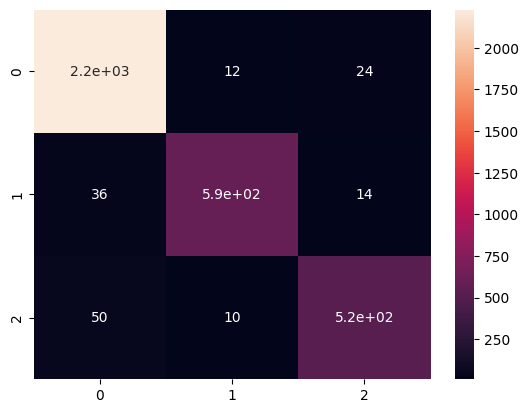

In [25]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Evaluate Model
y_pred_clf=model.predict(X_test)
accuracy_clf=accuracy_score(y_test,y_pred_clf)*100

print('Accuracy:{:.2f}% '.format(accuracy_clf))
print('Precision:{:.2f}% '.format(precision_score(y_test,y_pred_clf,average='weighted')*100))
print('Recall:{:.2f}% '.format(recall_score(y_test,y_pred_clf,average='weighted')*100))
print('f1_score:{:.2f}% '.format(f1_score(y_test,y_pred_clf,average='weighted')*100))

sn.heatmap(confusion_matrix(y_test, y_pred_clf),annot=True)
print(classification_report(y_test,y_pred_clf))
 

In [33]:
compare={"Model Name":['MultinomialNB','GradientBoosting','DecisionTree','SVC','LogisticRegression','RandomForest','LGBMClassifier'],
        "Accuracy Score":[accuracy_n,accuracy_gb,accuracy_dt,accuracy_svc,accuracy_lr,accuracy_en,accuracy_clf]}
barp=pd.DataFrame(compare)
print(barp)


           Model Name  Accuracy Score
0       MultinomialNB       88.640275
1    GradientBoosting       92.656340
2        DecisionTree       85.111876
3                 SVC       95.783133
4  LogisticRegression       88.640275
5        RandomForest       95.381526
6      LGBMClassifier       95.811819


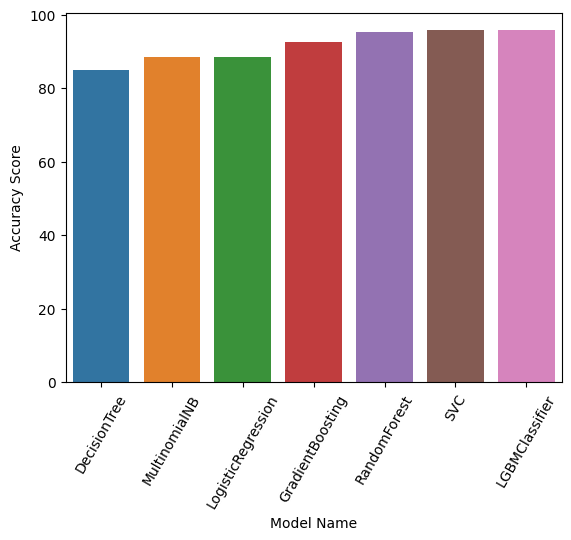

In [34]:
import matplotlib.pyplot as plt
barp.sort_values(by='Accuracy Score',inplace=True)
sn.barplot(x="Model Name",y="Accuracy Score",data=barp)
plt.xticks(rotation=60)
plt.show()

In [ ]:
# Convert the text data into numerical features using TF-IDF
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(df["review_text"])
#y = df["condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

for i in [MultinomialNB,GradientBoostingClassifier,DecisionTreeClassifier,SVC,LogisticRegression,RandomForestClassifier,LGBMClassifier]:
    # Train the Gradient Boosting model
    model= i()
    model.fit(X_train,y_train)

    # Evaluate Model
    y_pred=model.predict(X_test)
    y_pred_t=model.predict(X_train)
    print('Model Name: ',i)
    print('Train Accuracy: {:.2f}% '.format(accuracy_score(y_train,y_pred_t)*100))
    print('Test Accuracy: {:.2f}% '.format(accuracy_score(y_test,y_pred)*100))
    print('Precision: {:.2f}% '.format(precision_score(y_test,y_pred,average='weighted')*100))
    print('Recall: {:.2f}% '.format(recall_score(y_test,y_pred,average='weighted')*100))
    print('f1_score: {:.2f}% '.format(f1_score(y_test,y_pred,average='weighted')*100))
    print(classification_report(y_test,y_pred))
    print('=============================================================================================')
   


In [35]:

model=LGBMClassifier()
model = model.fit(X_train, y_train)

review=" I am so depressed now."
input_data=pd.Series([review])

vectorizer= TfidfVectorizer()
#tr_feature=vectorizer.fit_transform(X_train,y_train)
input_data_vector=vectorizer.fit_transform(input_data)

preds=model.predict(input_data_vector)
print('Predicted condition : ',preds[0])

ValueError: Number of features of the model must match the input. Model n_features_ is 9903 and input n_features is 4